# Used Car Data Analysis Using Web Scraping (Droom)


### STEP 1: DATA COLLECTION – WEB SCRAPING (DROOM USED CARS)

In [3]:
# normal2
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

headers = {'User-Agent': 'Mozilla/5.0'}

product_urls = []

for page in range(1, 50):    # scrape many pages
    print("Loading list page:", page)

    url = f"https://droom.in/cars?page={page}"
    r = requests.get(url, headers=headers)
    soup = BeautifulSoup(r.text, "html.parser")

    # find <a> tags with /product/
    for a in soup.find_all("a", href=True):
        href = a["href"]
        if "/product/" in href:
            full = "https://droom.in" + href
            product_urls.append(full)

    # stop if no more links
    if len(soup.find_all("a", href=True)) == 0:
        break

# remove duplicates
product_urls = list(set(product_urls))
print("Total product pages found:", len(product_urls))


all_data = []

for url in product_urls:
    print("Scraping:", url)

    r = requests.get(url, headers=headers)
    soup = BeautifulSoup(r.text, "html.parser")

    # title & price
    title_tag = soup.find("h1")
    price_tag = soup.find("span", class_="text-green-600")

    title = title_tag.text.strip() if title_tag else ""
    price = price_tag.text.strip() if price_tag else ""

    # vehicle information section
    info_section = soup.find("div", class_="vehicle-information-section")

    details = {
        "Title": title,
        "Price": price,
        "URL": url
    }

    if info_section:
        rows = info_section.find_all("li")

        for row in rows:
            spans = row.find_all("span")
            if len(spans) >= 2:
                key = spans[0].text.strip()
                value = spans[1].text.strip()
                details[key] = value

    all_data.append(details)


Loading list page: 1
Loading list page: 2
Loading list page: 3
Loading list page: 4
Loading list page: 5
Loading list page: 6
Loading list page: 7
Loading list page: 8
Loading list page: 9
Loading list page: 10
Loading list page: 11
Loading list page: 12
Loading list page: 13
Loading list page: 14
Loading list page: 15
Loading list page: 16
Loading list page: 17
Loading list page: 18
Loading list page: 19
Loading list page: 20
Loading list page: 21
Loading list page: 22
Loading list page: 23
Loading list page: 24
Loading list page: 25
Loading list page: 26
Loading list page: 27
Loading list page: 28
Loading list page: 29
Loading list page: 30
Loading list page: 31
Loading list page: 32
Loading list page: 33
Loading list page: 34
Loading list page: 35
Loading list page: 36
Loading list page: 37
Loading list page: 38
Loading list page: 39
Loading list page: 40
Loading list page: 41
Loading list page: 42
Loading list page: 43
Loading list page: 44
Loading list page: 45
Loading list page: 

In [9]:
import pandas as pd

# convert list of dictionaries to DataFrame
df = pd.DataFrame(all_data)

# save to CSV
df.to_csv("droom_used_cars.csv", index=False)

print("CSV file saved successfully!")


CSV file saved successfully!


### STEP 2: DATA CLEANING – DROOM USED CARS DATA

In [14]:
import pandas as pd
import numpy as np

# load raw data
df = pd.read_csv("droom_used_cars.csv")

# ---------------- 1. DROP PRICE (ALL VALUES ARE NaN) ----------------
# Price column has 0 non-null values, so remove it
df.drop(columns=["Price"], inplace=True)

# ---------------- 2. CLEAN KMs Driven ----------------
# remove 'Km', commas and convert to numeric
df["KMs Driven"] = (
    df["KMs Driven"]
    .str.replace("Km", "", regex=False)
    .str.replace(",", "", regex=False)
    .str.strip()
)

df["KMs Driven"] = pd.to_numeric(df["KMs Driven"], errors="coerce")

# ---------------- 3. CLEAN No. of Owners ----------------
df["No. of Owners"] = pd.to_numeric(df["No. of Owners"], errors="coerce")

# ---------------- 4. HANDLE MISSING VALUES ----------------
# drop rows where important fields are missing
df.dropna(subset=["KMs Driven", "No. of Owners", "Registration", "Location"], inplace=True)

# ---------------- 5. REMOVE DUPLICATES ----------------
df.drop_duplicates(inplace=True)

# ---------------- 6. RESET INDEX ----------------
df.reset_index(drop=True, inplace=True)

# ---------------- 7. SAVE CLEANED DATA ----------------
df.to_csv("droom_cleaned_data.csv", index=False)

# check cleaned data
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1158 entries, 0 to 1157
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              1158 non-null   object 
 1   URL                1158 non-null   object 
 2   Registration Year  1158 non-null   int64  
 3   Make               1158 non-null   object 
 4   Model              1158 non-null   object 
 5   Trim               1158 non-null   object 
 6   KMs Driven         1158 non-null   float64
 7   No. of Owners      1158 non-null   float64
 8   Transmission       1158 non-null   object 
 9   Fuel Type          1158 non-null   object 
 10  Body Type          1158 non-null   object 
 11  Registration       1158 non-null   object 
 12  Location           1158 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 117.7+ KB


,Title,URL,Registration Year,Make,Model,Trim,KMs Driven,No. of Owners,Transmission,Fuel Type,Body Type,Registration,Location
0,2013 Volkswagen Vento 1.2L TSI Highline Plus AT,https://droom.in/product/volkswagen-vento-12l-...,2013,Volkswagen,Vento,1.2L TSI HIGHLINE PLUS AT,68000.0,2.0,Automatic,Petrol,Sedan,DL 4C,Delhi
1,2017 Maruti Suzuki Ciaz VDi SHVS,https://droom.in/product/maruti-suzuki-ciaz-vd...,2017,Maruti Suzuki,Ciaz,VDI SHVS,97123.0,1.0,Manual,Diesel,Sedan,UP 11,Saharanpur (UP)
2,2015 Mahindra XUV500 W4,https://droom.in/product/mahindra-xuv500-w4-20...,2015,Mahindra,XUV500,W4,78000.0,1.0,Manual,Diesel,SUV,DL 2C,Delhi
3,2021 Honda Civic V CVT i-VTEC BS6,https://droom.in/product/honda-civic-v-cvt-i-v...,2021,Honda,Civic,V CVT I-VTEC BS6,76000.0,1.0,Automatic,Petrol,Sedan,HG 78,Delhi
4,2018 Jaguar F-Pace Prestige,https://droom.in/product/jaguar-f-pace-prestig...,2018,Jaguar,F-PACE,PRESTIGE,75000.0,1.0,Automatic,Diesel,SUV,HR 51,Delhi


### STEP 3: EXPLORATORY DATA ANALYSIS (EDA) – DROOM USED CARS

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1158 entries, 0 to 1157
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              1158 non-null   object 
 1   URL                1158 non-null   object 
 2   Registration Year  1158 non-null   int64  
 3   Make               1158 non-null   object 
 4   Model              1158 non-null   object 
 5   Trim               1158 non-null   object 
 6   KMs Driven         1158 non-null   float64
 7   No. of Owners      1158 non-null   float64
 8   Transmission       1158 non-null   object 
 9   Fuel Type          1158 non-null   object 
 10  Body Type          1158 non-null   object 
 11  Registration       1158 non-null   object 
 12  Location           1158 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 117.7+ KB


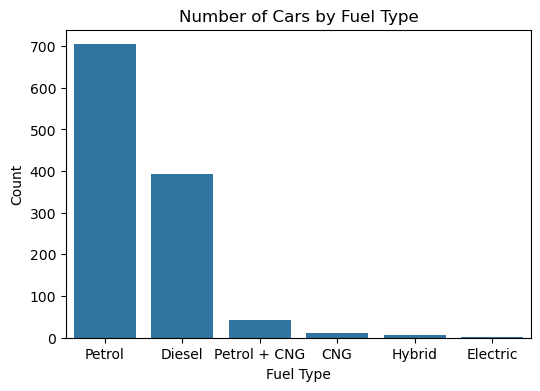

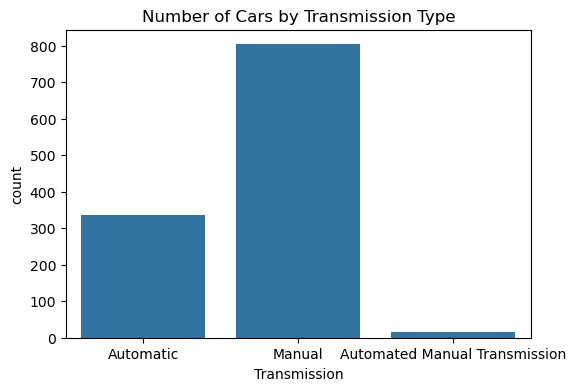

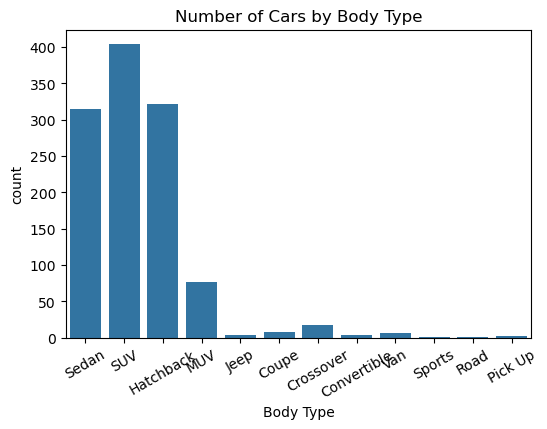

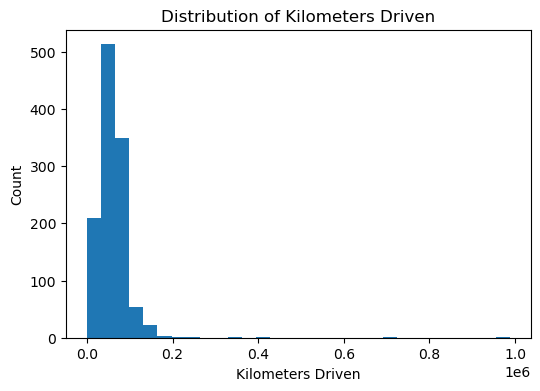

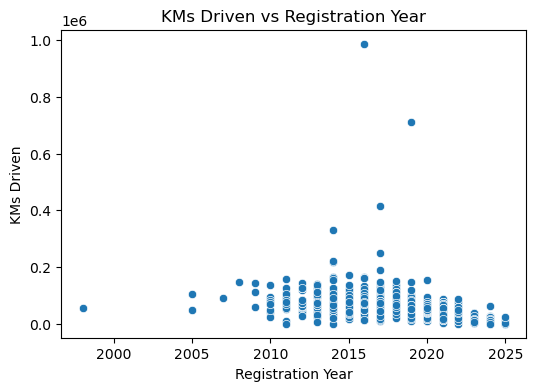

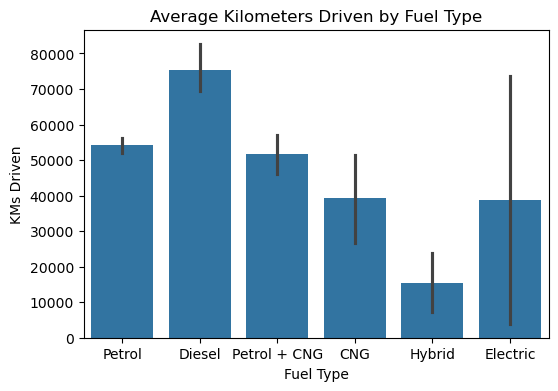

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# ---------------- 1. BASIC DATA OVERVIEW ----------------
df.shape
df.info()
df.describe()

# ---------------- 2. COUNT OF CARS BY FUEL TYPE ----------------
df["Fuel Type"].value_counts()

# ---------------- 3. COUNT OF CARS BY TRANSMISSION ----------------
df["Transmission"].value_counts()

# ---------------- 4. COUNT OF CARS BY BODY TYPE ----------------
df["Body Type"].value_counts()

# ---------------- 5. TOP 10 BRANDS BY COUNT ----------------
df["Make"].value_counts().head(10)

# ---------------- 6. AVERAGE KMs DRIVEN BY FUEL TYPE ----------------
df.groupby("Fuel Type")["KMs Driven"].mean()

# ---------------- 7. AVERAGE KMs DRIVEN BY BODY TYPE ----------------
df.groupby("Body Type")["KMs Driven"].mean()

# ---------------- 8. OWNERSHIP DISTRIBUTION ----------------
df["No. of Owners"].value_counts()

# ---------------- 9. LOCATION-WISE CAR COUNT (TOP 10) ----------------
df["Location"].value_counts().head(10)

# ---------------- 10. YEAR-WISE CAR COUNT ----------------
df["Registration Year"].value_counts().sort_index()


# ---------------- 1. CARS COUNT BY FUEL TYPE ----------------
plt.figure(figsize=(6,4))
sns.countplot(x="Fuel Type", data=df)
plt.title("Number of Cars by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.show()

# ---------------- 2. CARS COUNT BY TRANSMISSION ----------------
plt.figure(figsize=(6,4))
sns.countplot(x="Transmission", data=df)
plt.title("Number of Cars by Transmission Type")
plt.show()

# ---------------- 3. CARS COUNT BY BODY TYPE ----------------
plt.figure(figsize=(6,4))
sns.countplot(x="Body Type", data=df)
plt.title("Number of Cars by Body Type")
plt.xticks(rotation=30)
plt.show()

# ---------------- 4. KMs DRIVEN DISTRIBUTION ----------------
plt.figure(figsize=(6,4))
plt.hist(df["KMs Driven"], bins=30)
plt.title("Distribution of Kilometers Driven")
plt.xlabel("Kilometers Driven")
plt.ylabel("Count")
plt.show()

# ---------------- 5. KMs DRIVEN VS REGISTRATION YEAR ----------------
plt.figure(figsize=(6,4))
sns.scatterplot(x="Registration Year", y="KMs Driven", data=df)
plt.title("KMs Driven vs Registration Year")
plt.show()

# ---------------- 6. AVERAGE KMs DRIVEN BY FUEL TYPE ----------------
plt.figure(figsize=(6,4))
sns.barplot(x="Fuel Type", y="KMs Driven", data=df)
plt.title("Average Kilometers Driven by Fuel Type")
plt.show()


### STEP 4: DATA VISUALIZATION & INSIGHTS – DROOM USED CARS


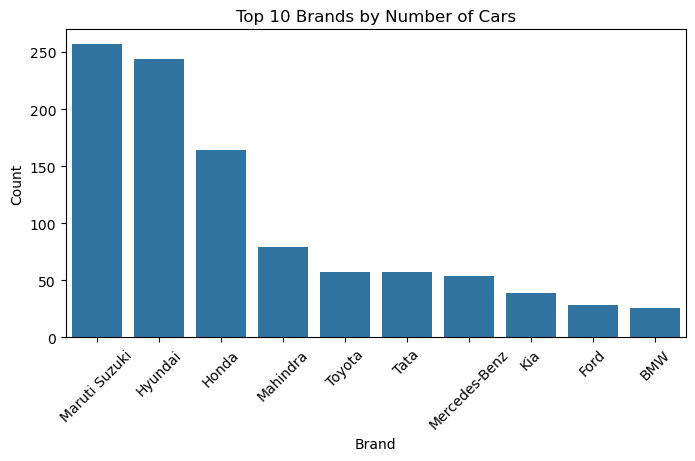

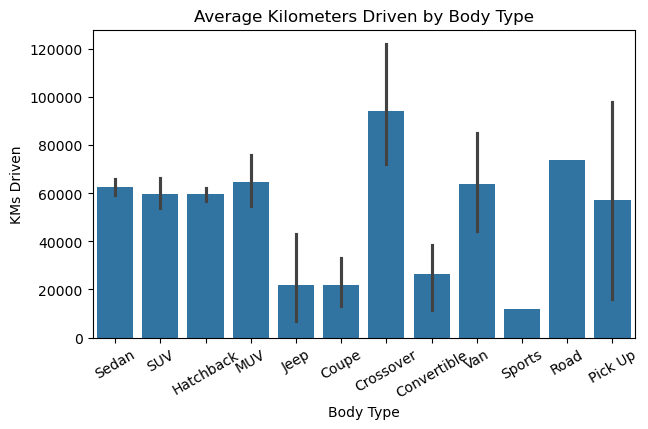

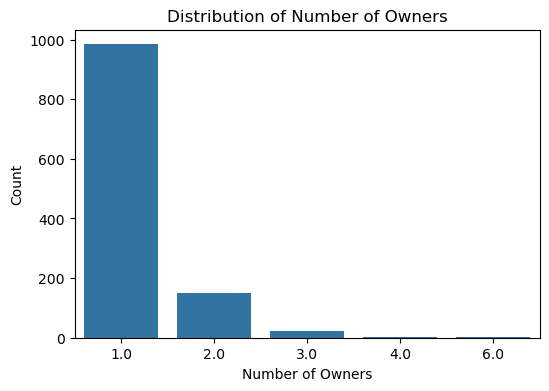

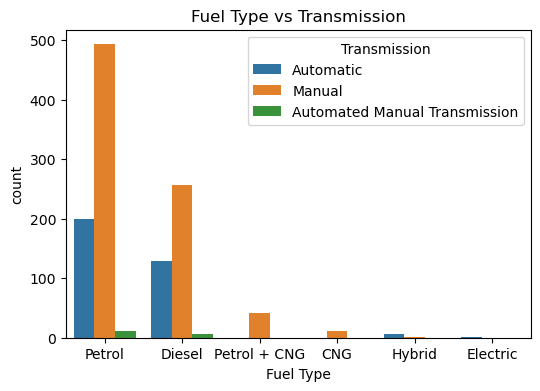

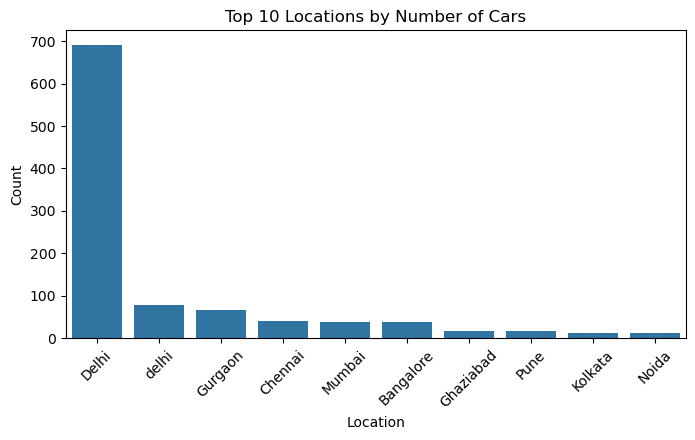

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load cleaned data
df = pd.read_csv("droom_cleaned_data.csv")

# ---------------- 1. TOP 10 BRANDS BY COUNT ----------------
plt.figure(figsize=(8,4))
top_brands = df["Make"].value_counts().head(10)
sns.barplot(x=top_brands.index, y=top_brands.values)
plt.title("Top 10 Brands by Number of Cars")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# ---------------- 2. AVERAGE KMs DRIVEN BY BODY TYPE ----------------
plt.figure(figsize=(7,4))
sns.barplot(x="Body Type", y="KMs Driven", data=df)
plt.title("Average Kilometers Driven by Body Type")
plt.xticks(rotation=30)
plt.show()

# ---------------- 3. OWNERSHIP DISTRIBUTION ----------------
plt.figure(figsize=(6,4))
sns.countplot(x="No. of Owners", data=df)
plt.title("Distribution of Number of Owners")
plt.xlabel("Number of Owners")
plt.ylabel("Count")
plt.show()

# ---------------- 4. FUEL TYPE VS TRANSMISSION ----------------
plt.figure(figsize=(6,4))
sns.countplot(x="Fuel Type", hue="Transmission", data=df)
plt.title("Fuel Type vs Transmission")
plt.show()

# ---------------- 5. LOCATION-WISE CAR COUNT (TOP 10) ----------------
plt.figure(figsize=(8,4))
top_locations = df["Location"].value_counts().head(10)
sns.barplot(x=top_locations.index, y=top_locations.values)
plt.title("Top 10 Locations by Number of Cars")
plt.xlabel("Location")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


## STEP 5: Final Insights & Conclusion

### Key Insights
- Maruti Suzuki, Hyundai, and Mahindra are the most listed brands, showing strong presence in the used car market.
- Diesel and Petrol cars dominate the dataset, while other fuel types are very limited.
- Manual transmission cars are more common than automatic cars in resale listings.
- Sedans and SUVs are the most popular body types among used cars.
- Most cars are first-owner vehicles, which usually have better resale demand.
- Delhi and nearby regions have the highest number of used car listings.
- Newer registration year cars generally have lower kilometers driven, indicating less usage.

### Conclusion
This project demonstrates a complete data analysis workflow using Python.  
It includes web scraping, data cleaning, Pandas-based exploratory data analysis, and insight generation.  
The analysis helps understand market trends, customer preferences, and usage patterns in the used car industry.
